1. [AWS Glue](#aws-glue)
2. [Glue Crawler / Data Catalog](#glue-crawler--data-catalog)
3. [Glue & S3 Partition](#glue--s3-partition)
4. [Create a crawler & database in AWS Glue](#create-a-crawler--database-in-aws-glue)
5. [Check and run the created crawler](#check-and-run-the-created-crawler)
6. [Glue + Hive](#glue--hive)
7. [Glue ETL(GUI)](#glue-etl-gui)
8. [Glue  ETL - DynamicFrame](#glue-etl---dynamicframe)
9. [Glue ETL - Transformations](#glue-etl---transformations)
10. [Glue ETL - ResolveChoice](#glue-etl---resolvechoice)
11. [Glue ETL - Modifying Data Catalog](#glue-etl---modifying-data-catalog)
12. [Running ETL Glue jobs with Bookmark](#running-etl-glue-jobs-with-bookmark)
13. [Glue Costs Model](#glue-costs-model)
14. [Glue Anti Pattern](#glue-anti-pattern)
15. [AWS Glue Studio](#aws-glue-studio)
16. [Hands On - Create AWS Glue Studio workflow with nodes](#hands-on---create-aws-glue-studio-workflow-with-nodes)
17. [Hands On - Add nodes to created AWS Glue Studio](#hands-on---add-nodes-to-created-aws-glue-studio)
18. [Connection & Connectors in AWS Glue](#connection--connectors-in-aws-glue)
19. [Hands On - Create Custom Connection & Connectors in AWS Glue](#hands-on---create-custom-connection--connectors-in-aws-glue)
20. [Hands On - AWS Glue Jobs Monitoring](#hands-on---aws-glue-jobs-monitoring)
21. [Hands On - AWS Glue Data classification tools](#hands-on---aws-glue-data-classification-tools)
22. [Hands On - AWS Glue Database](#hands-on---aws-glue-database)
23. [Hands On - AWS Glue Tables](#hands-on---aws-glue-data-classification-tools)
24. [Hands On - AWS Glue Triggers](#hands-on---aws-glue-triggers)
25. [AWS Glue Workflows](#aws-glue-workflows)
26. [Hands On - AWS Glue Workflows](#hands-on---aws-glue-workflows)
27. [Hands On - AWS Glue Security Configuration](#hands-on---aws-glue-security-configuration)
28. [AWS Glue Data Quality](#aws-glue-data-quality)
29. [Hands On - AWS Glue Data Quality for Data Catalog](#hands-on---aws-glue-data-quality)
30. [Hands On - AWS Glue Data Quality for ETL jobs](#hands-on---aws-glue-data-quality)
31. [AWS Glue - Zero ETL integrations](#aws-glue---zero-etl-integrations)
32. [AWS Glue Terminology](#aws-glue-terminology)

#### AWS Glue:
- to produce structured data from unstructured data which lie in S3
- used to hold table definitions and schema and perform ETL
- handles serverless discovery
    - process of automatically identifying and cataloging metadata about data sources, like tables and columns, across various data stores within your AWS environment
- it takes data from s3 data lake and provides schema, thereby enabling to query the data using SQL or SQL like tools such as RDS, Redshift, Athena, Amazon EMR
- enables custom ETL jobs
    - i.e. once it discovers the schema, we do data processing based on trigger when data is received, scheduled, on-demand.
    - ETL jobs use Apache spark which is used for distributed data processing
    - fully managed

#### Glue Crawler / Data Catalog:
- scans data in S3 to create schema for it
- runs periodically
- populates the Glue Data Catalog
    - stores the table definition
    - original data stays in S3
- once its cataloged, then we can treat unstructured data as structures data
- once the data is structured, it can be sent to Amazon EMR, Redshift, Athena, QuickSight (Athena -> QuickSight)

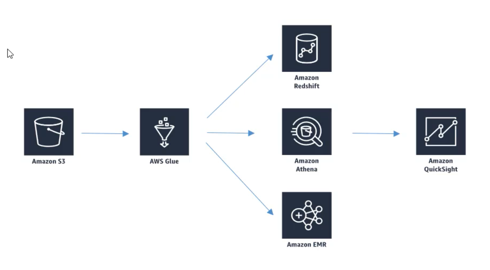

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/glue_crawler.jpeg')
new_image = img.resize((490, 270))
display(new_image)

#### Glue & S3 Partition:
- Glue crawler will extract partitions based on how S3 data and buckets are organized
- Think upfront on how we will be querying the data from S3 data lake
- Eg: devices send sensor data every hour
    - Do we query primarily based on time ranges?
        - organize buckets as "yyyy/mm/dd/device"
    - Do we query primarily based on device name?
        - organize buckets as "device/yyyy/mm/dd"

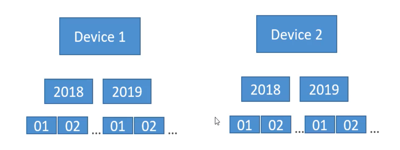

In [9]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/glue_crawler2.jpeg')
new_image = img.resize((400, 150))
display(new_image)

#### Create a crawler & database in AWS Glue:
- Go to AWS Glue console
    - Go to Data Catalog option (left-side pane)
        - Go to Crawler option
            - Create Crawler
                - Name
                - Data source configuration
                    - Add data source
                        - eg: S3
                        - location
                            - same account
                            - different account
                        - crawler runs
                            - crawl sub folders
                            - crawl based on events
                            - crawl new sub-folders only
                - Custom Classifier
                    - A classifier checks whether a given file is in a format the crawler can handle. If it is, the classifier creates a schema in the form of a StructType object that matches that data format.
            - Configure Security 
                - Create or use existing IAM roles
                - Use Lake Formation configuration for crawling (only applicable to S3, Glue Data Catalog, Iceberg data sources)
                - Encryption
            - Set Output & Scheduling
                - Target database
                    - Add Database
                        - Open the Database option in AWS Glue console
                            - Name
                            - Location
                    - choose the created database
                - Table name
                - Maximum table threshold
                - Crawler schedule
                    - on-demand

Note:
- CSV Serde:
    - used for processing of CSV files in HDFS

#### Check and run the created crawler:
- Go to AWS Glue console
    - Go to crawler option 
        - Created crawler has 5 major options:
            - crawler runs
            - schedule
            - data sources
            - classifiers
            - tags

- To run the crawler:
    - Go to AWS Glue console
        - Go to crawler option 
            - Choose the crawler and select run crawler option (right-side top)

- After running the crawler, we can go to Tables option under the Data Catalog option in AWS Glue to see the created tables based on the S3 partition.
- Open the created Tables to see the Schema/Partitions/Indexes created as part of the crawler run

#### Glue + Hive:
- Hive enables us to run SQL like queries (HiveQL) from EMR (Elastic Map Reduce)
- the Glue Data Catalog serves as a Hive "metastore"
- we can also import a Hive metastore into Glue

#### Glue ETL (GUI):
- automatic ETL code generation for transforming the data, cleaning the data, enriching the data
    - either in scala or python for the underlying Apache Spark Engine
    - instead of automatic code generation, we can also provide our own Spark/PySpark script
- Encryption
    - server side at rest
    - SSL in transit
- can be scheduled (Glue Scheduler) or event driven (Glue Trigger) i.e. ETL jobs can be started automatically
- can provision additional DPUs to increase performance of the underlying spark jobs
    - enabling job metrics in the Glue console help in understanding max capacity in DPUs we want 
    - can plot max needed executors vs max allocated executors in the Glue console to tune the number of DPUs
- error logs reported to CloudWatch
    - could be tied to SNS for notification as well
- targets can be S3, JDBC (RDS,Redshift) or into Glue Data Catalog
- fully managed, cost effective and pay for the resources consumed
- jobs are run on serverless spark platform

#### Glue ETL - DynamicFrame:
- Designed to provide a flexible data model for ETL (extract, transform, and load) operations
- DynamicFrames are collection of dynamic records like fields of rows & columns
- DynamicFrames are self describing and have a schema
- similar to Spark DataFrame but with more ETL stuffs
- Scala & Python APIs

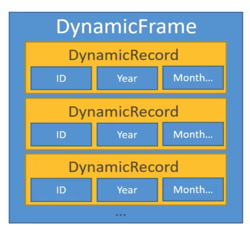

In [17]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dynamicframes1.jpeg')
new_image = img.resize((250, 230))
display(new_image)

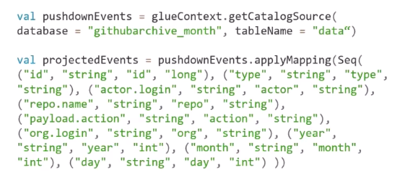

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dynamicframes.jpeg')
new_image = img.resize((400, 190))
display(new_image)

#### Glue ETL - Transformations:
- Bundled transformation:
    - DropFields, DropNullFields => remove null (empty) fields
    - Filters = specify a function to filter records
    - Join = to enrich data
    - Maps = add,delete fields and also perform external lookups

- Machine Learning transformation:
    - FindMatches ML: identify duplicate records or matching records even if no fields match exactly 

- Format Conversions:
    - CSV, JSON, Avro, Parquet, ORC, XML

- Apache Spark transformation:
    - Since Glue ETL uses Apache Spark underneath, so whatever Spark can perform, we can perform the same on Glue ETL such as applying clustering ML algorithm via Spark XML lib package

#### Glue ETL - ResolveChoice:
- deals with ambiguity in DynamicFrame (ambiguity means, two fields having the same name)
- Eg: as shown below


In [20]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/resolvechoice.jpeg')
new_image = img.resize((350, 30))
display(new_image)

- make_cols: use it along with ResolveChoice API to resolve the above issue of ambiguity which will create new columns for each type
    - like price_double, price_string, etc
- cast: cast all values to a specific type as shown below
- make_struct: creates a structure that contains each data type
- project: project every type to a given type, eg: project:string will convert the price decimal value to string as shown in above example

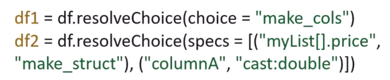

In [23]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/resolvechoice1.jpeg')
new_image = img.resize((390, 80))
display(new_image)

#### Glue ETL - Modifying Data Catalog:
- ETL scripts can update schema and partitions if necessary
- Updating or adding new partitions:
    - re-run crawler
    - or have the ETL script use "enableUpdateCatalog" and partition keys options 
- Updating table schema:
    - re-run crawler
    - or have the ETL script use "enableUpdateCatalog/updateBehavior" from ETL script
- Create new tables:
    - have the ETL script use enableUpdateCatalog/updateBehavior with setCatalogInfo
- Restrictions on modifying data catalog
    - S3 only data store
    - json, csv, avro, parquet, only
    - Parquet requires special mode
    - Nested schema is not supported

#### Running ETL Glue jobs with Bookmark:
- Time-based schedules (cron style)
- Job Bookmarks:
    - persist state from job run (only new data will be processed instead the whole data again)
    - prevents processing of old data
    - allows to process only new data during re-run on a schedule
    - works with s3 sources in a variety of formats
    - works with relational database via JDBC (if primary keys are in sequential order)
        - only handles new rows and not new columns
- CloudWatch Events:
    - fires off a lambda function or SNS notification when ETL succeeds or fails
    - invoke EC2 run, send event to Kinesis, activate Step Function

#### Glue Costs Model:
- billed by seconds for glue crawler and ETL jobs
- billed by minutes for development endpoints for developing ETL code
- first million objects stored and accessed are free for Glue Data Catalog

#### Glue Anti Pattern:
- Multiple ETL Engines
    - Glue using Spark underneath
    - If we want to use other ETL engines too like Hive, Pig, etc
    - Then, use EMR (Elastic Map Reduce)

- No longer Anti pattern:
    - Glue ETL supports serverless ETL streaming
        - consumes from Kinesis or Kafka
        - clean and transform in flight
        - store results into S3 or other data stores
        - uses Apache Spark Structured Streaming (allows real time processing of streaming data)
        - if we have Spark script which is built for batch processing of data, then it applicable for streaming data as well

#### AWS Glue Studio:
- visual interface for ETL
- visual job editor
    - create DAGs for complex workflows
    - sources: S3, Kinesis, Kafka, JDBC (Redshift, RDS)
    - targets: S3 or Glue Data Catalog
    - Transform, sample, join data
    - supports partitioning
- visual job dashboard
    - overview, status, run times

#### Hands On - Create AWS Glue Studio workflow with nodes:
- Go to AWS Glue console
    - Go to Data Integration and ETL option
        - Go to ETL jobs
            - Visual ETL (this opens an visual editor very similar like a step function visual editor)
                - Visual
                    - Data source properties
                    - Transform
                    - Output Schema
                    - Data preview
                    - Data target properties
                - Script
                - Job details
                    - Name
                    - IAM role
                    - Spark
                    - Glue version
                    - Language
                    - Worker type
                    - Number of workers
                    - Job Bookmark
                    - Number of retries
                    - Job timeout
                - Runs
                - Data quality
                - Schedules
                - Version control

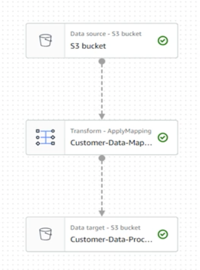

In [33]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/studio2.jpeg')
new_image = img.resize((200, 270))
display(new_image)

#### Hands On - Add nodes to created AWS Glue Studio:
- Click on the "+" blue option on the left
- We can add any new nodes from source, transform, target categories as shown below

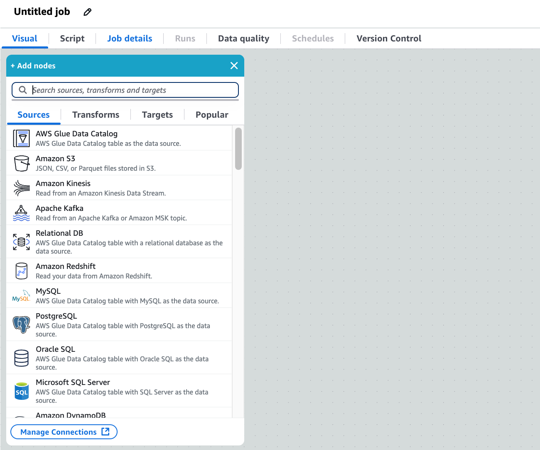

In [34]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/studio.jpeg')
new_image = img.resize((540, 450))
display(new_image)

#### Connection & Connectors in AWS Glue:

- A connection contains the properties that are required to connect to a particular data store. When you create a connection, it is stored in the AWS Glue Data Catalog. 
- You choose a connector, and then create a connection based on that connector.
- Connectors:
    - Marketplace connectors
        - to create marketplace connectors, we need to subscribe to a pricing model in aws marketplace
    - Custom connectors

#### Hands On - Create Custom Connection & Connectors in AWS Glue:
- Go to AWS Glue console
- Go to Data Catalog
    - Go to Connections option
        - Create custom connector
            - Connector S3
            - Name
            - Connector type
            - class (JDBC driver)
            - JDBC url base
                - JDBC syntax for most database engines is jdbc:protocol://host:port/database_name/
                - SQL server syntax is jdbc:sqlserver://host:port;database_name=db_name
                - Oracle syntax is jdbc:oracle:thin://@host:port/service_name/
            - URL parameter delimiter
            - Require SSL connection

#### Hands On - AWS Glue Jobs Monitoring:
- Go to AWS Glue console
    - Go to Data integration and ETL
        - Go to ETL jobs options
            - Go to Job run monitoring
                - uses date range
                - job runs history
                - resource usage
                - job type breakdown
                - worker type breakdown

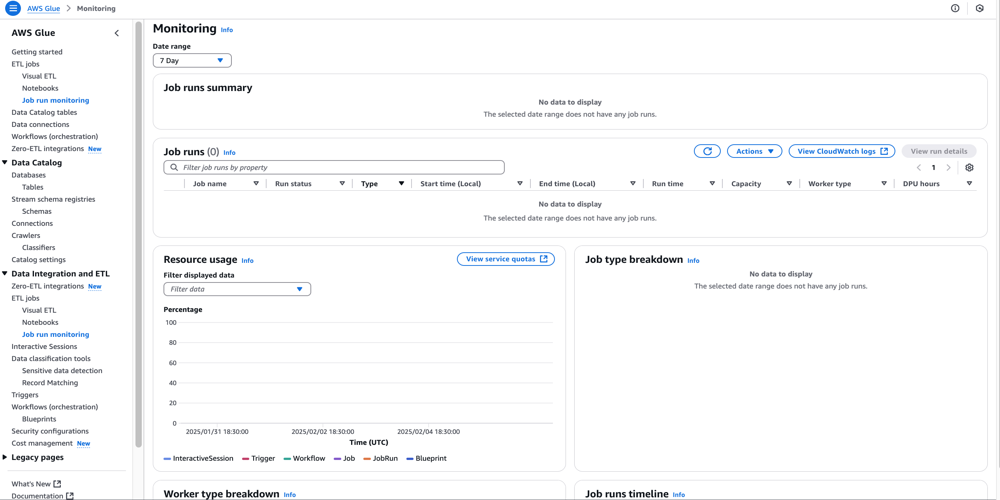

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/monitor.jpeg')
new_image = img.resize((1000, 500))
display(new_image)

#### Hands On - AWS Glue Data classification tools:
- Go to AWS Glue console
    - Go to Integration and ETL option
        - Go to Data Classification tools
            - Sensitive data detection
                - Name
                - Regex pattern
                - Context words
            - Record Matching
                - Transform properties
                    - Name
                    - IAM role
                    - Task execution settings
                        - worker type
                        - no. of workers
                        - task timeout
                        - number of retries
                        - glue version
                    - Security Configuration
                        - Choose configures security configuration
                        - Target encryption using KMS (SSE-KMS)
                - Table & Primary keys configuration
                    - database
                    - table
                    - primary key
                - Tuning Options
                - Review and Create

#### Hands On - AWS Glue Database:
- Go to AWS Glue console
    - Go to Data Catalog
        - Go to Database
            - Name
            - Database settings
                - location

#### Hands On - AWS Glue Tables:
- Go to AWS Glue console
    - Go to Data Catalog
        - Go to Tables
            - Add Tables
                - Table properties
                    - Name
                    - Database
                    - Table format
                        - AWS glue tables
                        - Apache Iceberg tables
                    - Data Store
                        - Type
                            - S3
                            - Kinesis
                            - Kafka
                        - Location
                            - same account
                            - another account
                            - path
                        - Data Format
                            - Avro
                            - CSV
                            - JSON
                            - ORC
                            - Parquet
                            - XML
                - Define Schema
                    - Add Schema
                        - column number
                        - name
                        - set as partition keys
                        - data type
                    - Add Index
                        - name
                        - keys
                - Review and Create

#### Hands On - AWS Glue Triggers:
- Go to AWS Glue console
    - Go to Data Integration & ETL
        - Go to Triggers (event driven)
            - Add trigger
                - Trigger properties
                    - Name
                    - Type
                        - On-demand
                        - Schedule
                            - frequency
                            - start time
                        - Job or crawler event (job or crawler events match your watched list.)
                            - logic
                                - all
                                - any
                            - watched resource
                                - Crawler
                                    - crawler name (drop-down)
                                    - succeed
                                    - failed
                                    - cancelled
                                - Job
                                    - job name (drop-down)
                                    - status
                                        - succeed
                                        - failed
                                        - stopped
                                        - timeout
                - Jobs or Crawlers to activate
                    - Add target resource
                        - Job
                            - job name (drop-down)
                        - Crawler
                            - crawler name (drop-down)
                - Review and create

Note:
- A trigger exists is either CREATED, ACTIVATED, or DEACTIVATED states. 
- There are also transitional states, such as ACTIVATING.

#### AWS Glue Workflows:
- Design multi job, multi crawler ETL processes to run together
- create workflows either via API or Blueprint or console
- to orchestrate complex ETL transformation operations

Triggers within Glue workflow:
- Triggers within workflows can start both jobs and crawlers and can be fired when jobs or crawlers complete. 
- Using triggers, you can create large chains of interdependent jobs and crawlers. 
- In addition to triggers within a workflow that define job and crawler dependencies, each workflow has a start trigger. 
- There are three types of start triggers:
    - Schedule – The workflow is started according to a schedule that you define. The schedule can be daily, weekly, monthly, and so on, or can be a custom schedule based on a cron expression.
    - On demand – The workflow is started manually from the AWS Glue console, API, or AWS CLI.
    - EventBridge event – The workflow is started upon the occurrence of a single Amazon EventBridge event or a batch of Amazon EventBridge events.
        - Batch of events starting a workflow (waiting until we reach the specified conditions)
            - Batch Window
                - default and maximum batch window is 900 seconds (15 minutes)
            - Batch Size

Blueprint Workflow:
- AWS Glue blueprints provide a way to create and share AWS Glue workflows. 
- When there is a complex ETL process that could be used for similar use cases, rather than creating an AWS Glue workflow for each use case, you can create a single blueprint

Note:
- Link: https://docs.aws.amazon.com/glue/latest/dg/workflows_overview.html 
- Blueprint: https://docs.aws.amazon.com/glue/latest/dg/blueprints-overview.html 

#### Hands On - AWS Glue Workflows:
- Go to AWS Glue console
    - Go to Integration and ETL option
        - Go to Workflows
            - Create Workflow
                - Name
                - Properties    
                    - Max concurrency
                    - Run properties
                        - Key-Value
                        - Add property
        - Go to Blueprints
            - Create Blueprint (another way to create workflow)
                - Name
                - ZIP archive location (S3)

#### Hands On - AWS Glue Security Configuration:
- Go to AWS Glue console
    - Go to Integration and ETL option
        - Go to Security Configurations
            - Name
            - Encryption settings
                - Enable S3 encryption
                - Enable CloudWatch logs encryption
                - Enable job bookmark encryption
                - enable data quality encryption

#### AWS Glue Data Quality:
- Used to measure and monitor the quality of your data
- Data Quality is implemented on tables from AWS Glue
- This is a step we can inject in our Glue ETL job
- We can create rules for Data Quality in Glue ETL jobs manually or automatically
- integrate the rules into the Glue jobs
- rules are created using Data Quality Definition Language (DQDL)
- Results can be used to fail the ETL Glue job or just report it to CloudWatch

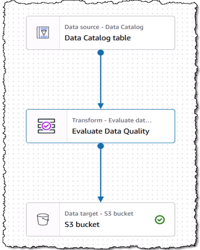

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/quality.jpeg')
new_image = img.resize((200, 250))
display(new_image)

#### Hands On - AWS Glue Data Quality for Data Catalog:
- Go to AWS Glue console
- Go to Data Catalog option
    - Go to Tables option
        - Choose and open any one of the tables available
            - Table Overview
            - Data Quality
                - Data Quality Snapshot
                - Data Quality Rules
                    - Create Rules
                        - Recommended Rules (automatic)
                            - IAM role
                            - filter data at source
                            - number of workers
                            - task timeout
                        - Insert Recommended Rules
                            - Choose all the recommended rules if needed
                            - Add Selected rules
                        - Helper (left-side to the rules editor)
                            - Rule types
                            - Schema
                        - Save Ruleset
                        - Run the Saved Ruleset
                    - Data Quality Rules option now has a new rule run history with quality percentage in terms of the number of rules passed out of the overall rules
                
Note:
- the table chosen has 3 files
    - clean_trip_data
    - raw_trip_data
    - payment_type_reference (used for cleaning the raw_trip_data)

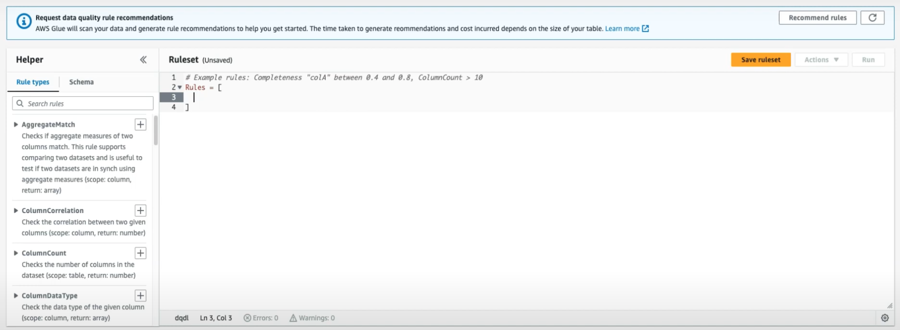

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rules.jpeg')
new_image = img.resize((900, 330))
display(new_image)

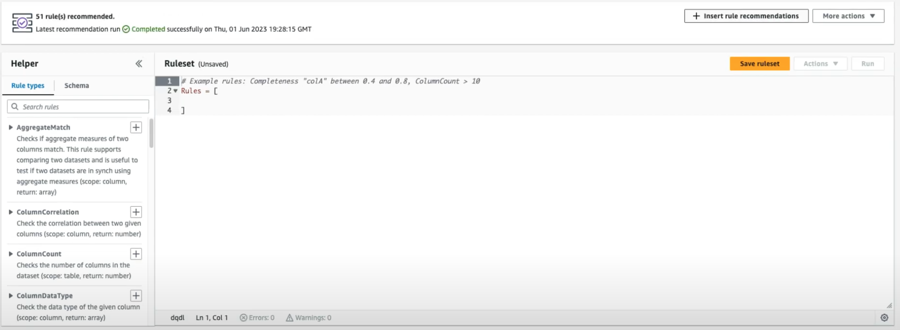

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rules1.jpeg')
new_image = img.resize((900, 330))
display(new_image)

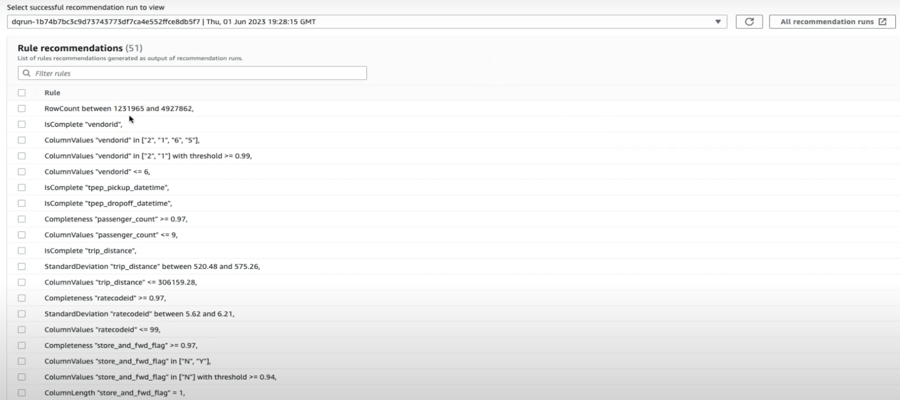

In [16]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rules2.jpeg')
new_image = img.resize((900, 400))
display(new_image)

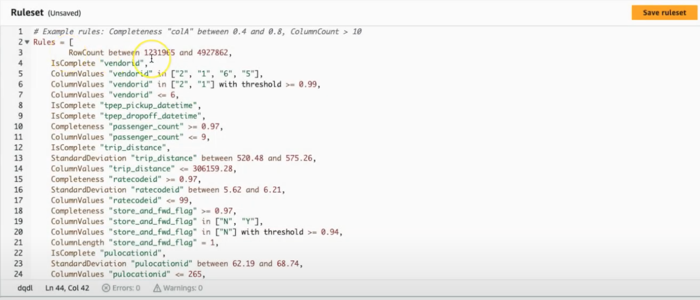

In [17]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rules3.jpeg')
new_image = img.resize((700, 300))
display(new_image)

- write a rule to check payment types in clean_trip is also present in the payment type reference table
    - Referential Integrity
- go to schema from Helper option
    - update reference tables
        - enter the reference table details
- the below command describes that the 100% of payment type present in clean_trip table should match the payment type in payment_type_reference table

In [30]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rules6.jpeg')
new_image = img.resize((900, 30))
display(new_image)

- write another rule "AggregateMatch" to check if all data from raw_trips table is present in clean_trip table

In [43]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rules7.jpeg')
new_image = img.resize((690, 22))
display(new_image)

#### Setting up alerts and notifications in Amazon EventBridge integration:
- AWS Glue supports publishing EventBridge events upon completion of a Data Quality ruleset evaluation run
- Link: https://docs.aws.amazon.com/glue/latest/dg/data-quality-alerts.html

#### Hands On - AWS Glue Data Quality for ETL jobs:
- Go to AWS Glue console
    - Go to ETL jobs option
        - Go to Visual ETL option and see the below picture

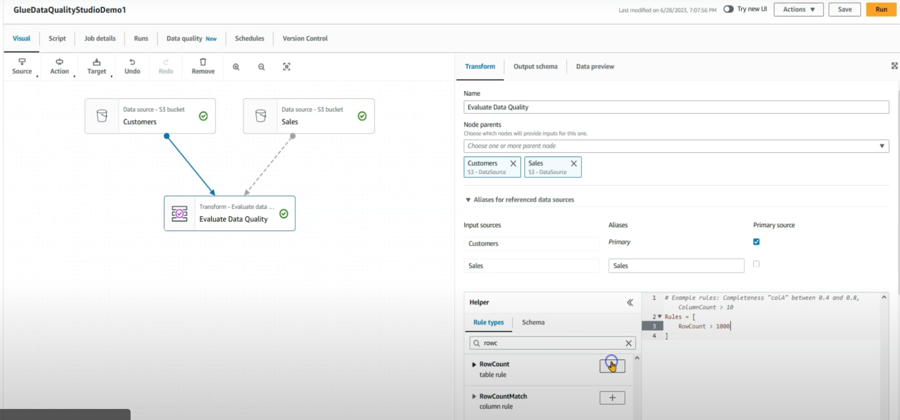

In [44]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rules5.jpeg')
new_image = img.resize((900, 420))
display(new_image)

- "CustomSql" statement below check if each row has either Telephone number value or Email id value and not null

In [49]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rules8.jpeg')
new_image = img.resize((350, 30))
display(new_image)

- Under Transform option (Evaluate Data Quality)
- Go to Data Quality transform output 
    - Enable Original data (this is done if we want to stop Data Quality job if any data quality errors indicated)
        - Add new columns to indicate data quality issues
            - DataQualityRulesPass
            - DataQualityRulesFail
            - DataQualityRulesSkip
            - DataQualityEvaluationResult
    - Enable Data Quality results
        - to output configures data quality rules and their pass/fail status and take custom actions
    - Enable Data Quality Actions
        - Publish results to CloudWatch 
    - On ruleset failure
        - Continue with Job
        - Fail Job after loading Target data
        - Fail Job without loading Target data
- Performance configuration
    - cache data

#### AWS Glue - Zero ETL integrations:
- Zero-ETL integrations in AWS Glue simplify/minimize the need to build ETL data pipelines for data ingestion and replication from AWS data services and third-party applications to AWS destinations.
- It makes data available in Amazon SageMaker Lakehouse and Amazon Redshift from multiple operational, transactional, and application sources
- Sources: SalesForce, DynamoDB, SAP, ServiceNow, Zendesk, etc
- Target: Amazon Redshift, Amazon SageMaker Lakehouse

#### AWS Glue Terminology:
Data Quality Definition Language (DQDL):
- A domain-specific language that you can use to write AWS Glue Data Quality rules.

Data Quality:
- AWS Glue Data Quality evaluates rules against a dataset to measure data quality

Data Quality Score:
- The percentage of data quality rules that pass (result in true) when you evaluate a ruleset with AWS Glue Data Quality

Data Quality Rule:
- A DQDL expression that checks your data for a specific characteristic and returns a Boolean value

Analyzer:
- A DQDL expression that gathers data statistics. An analyzer gathers data statistics that can be used by ML algorithms to detect anomalies and hard-to-detect data quality issues over time.

Ruleset:
- An AWS Glue resource that comprises a set of data quality rules. A ruleset must be associated with a table in the AWS Glue Data Catalog or ETL jobs

Observation
- An unconfirmed insight generated by AWS Glue by analyzing data statistics gathered from rules and analyzers over time.

Note:
- AWS Glue APIs: https://docs.aws.amazon.com/glue/latest/dg/data-quality-using-apis.html 